In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, recall_score
from collections import Counter

In [2]:
df=pd.read_csv("D:/final/generated_insurance_claims.csv")

In [3]:
df.head()

,Claim_ID,Claim_Date,Customer_ID,Claim_Amount,Annual_Income,Claim_Type,Suspicious_Flags,Fraud_Label,Policy_Issuance_Date
0,b884ddc0-5786-447c-9682-5e7d1d21d87b,2016-05-02,19403786-fd8f-4494-92b5-9a32b89e292f,38327,35708,Medical,1,0,2009-08-17
1,722d397b-3a5c-4d92-95d8-3f9c301e08e5,2024-06-14,ba29f6bc-3a28-4c89-a6e0-dfc7203a6211,5916,116777,Home,1,1,2024-02-28
2,68841882-21bb-4377-b9c7-df999f181c5d,2023-10-13,01c63e10-85b3-4c98-8da7-d60049359c1d,20006,134926,Life,0,1,2017-07-23
3,5bb071ed-8d1f-41cf-8825-c35a3b04fe57,2023-12-24,fcc85982-ffa0-4812-8a68-ec90ca32545d,23443,92565,Auto,1,1,2013-11-18
4,8c9fd3bf-16e6-40fa-a82b-e96551d82073,2023-09-28,c6b84722-1780-4cb3-8b0d-89090922eb18,41402,92625,Medical,0,0,2022-06-02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Claim_ID              500 non-null    object
 1   Claim_Date            500 non-null    object
 2   Customer_ID           500 non-null    object
 3   Claim_Amount          500 non-null    int64 
 4   Annual_Income         500 non-null    int64 
 5   Claim_Type            500 non-null    object
 6   Suspicious_Flags      500 non-null    int64 
 7   Fraud_Label           500 non-null    int64 
 8   Policy_Issuance_Date  500 non-null    object
dtypes: int64(4), object(5)
memory usage: 35.3+ KB


In [5]:
df.describe()

,Claim_Amount,Annual_Income,Suspicious_Flags,Fraud_Label
count,500.000000,500.00000,500.000000,500.000000
mean,26106.594000,90577.71600,0.502000,0.524000
std,14144.183972,34725.81448,0.500497,0.499924
min,1053.000000,30712.00000,0.000000,0.000000
25%,14189.250000,61005.75000,0.000000,0.000000
50%,26697.500000,92187.50000,1.000000,1.000000
75%,38544.750000,118750.25000,1.000000,1.000000
max,49926.000000,149911.00000,1.000000,1.000000


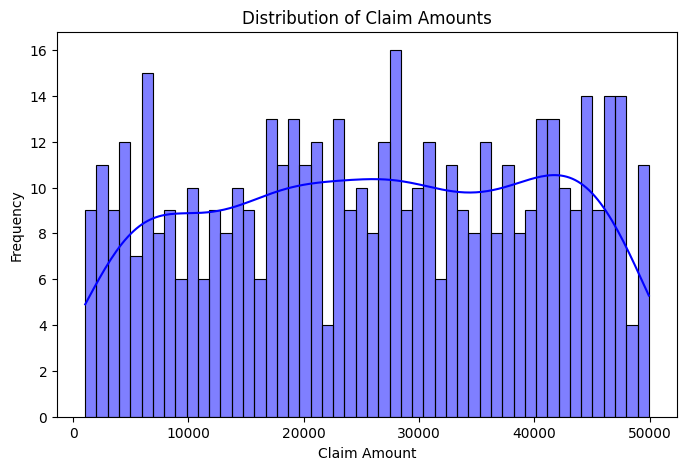

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["Claim_Amount"], bins=50, kde=True, color="blue")
plt.title("Distribution of Claim Amounts")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.show()


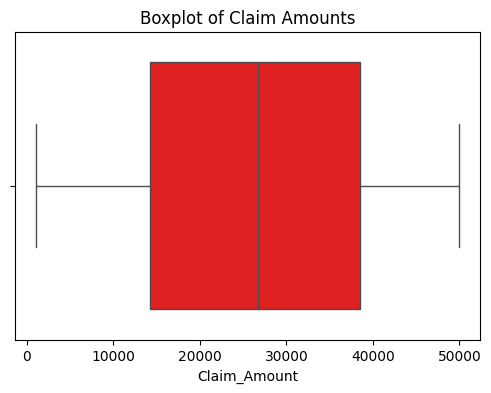

In [7]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Claim_Amount"], color="red")
plt.title("Boxplot of Claim Amounts")
plt.show()


C:\Users\naveen\AppData\Local\Temp\ipykernel_16780\4192937450.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Fraud_Label"], y=df["Claim_Amount"], palette="coolwarm")


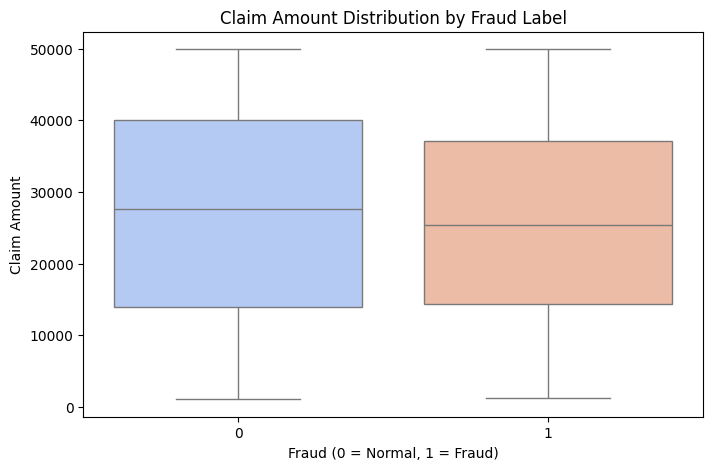

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Fraud_Label"], y=df["Claim_Amount"], palette="coolwarm")
plt.title("Claim Amount Distribution by Fraud Label")
plt.xlabel("Fraud (0 = Normal, 1 = Fraud)")
plt.ylabel("Claim Amount")
plt.show()


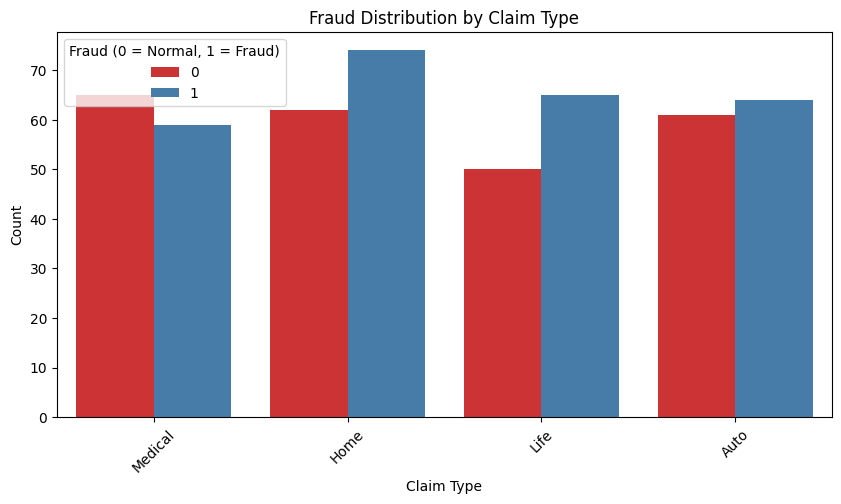

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Claim_Type", hue="Fraud_Label", data=df, palette="Set1")
plt.title("Fraud Distribution by Claim Type")
plt.xlabel("Claim Type")
plt.ylabel("Count")
plt.legend(title="Fraud (0 = Normal, 1 = Fraud)")
plt.xticks(rotation=45)
plt.show()


In [128]:
# Convert Date to datetime format
df['Claim_Date'] = pd.to_datetime(df['Claim_Date'])
df['Policy_Issuance_Date'] = pd.to_datetime(df['Policy_Issuance_Date'])

In [129]:
df.head()

,Claim_ID,Claim_Date,Customer_ID,Claim_Amount,Annual_Income,Claim_Type,Suspicious_Flags,Fraud_Label,Policy_Issuance_Date
0,b884ddc0-5786-447c-9682-5e7d1d21d87b,2016-05-02,19403786-fd8f-4494-92b5-9a32b89e292f,38327,35708,Medical,1,0,2009-08-17
1,722d397b-3a5c-4d92-95d8-3f9c301e08e5,2024-06-14,ba29f6bc-3a28-4c89-a6e0-dfc7203a6211,5916,116777,Home,1,1,2024-02-28
2,68841882-21bb-4377-b9c7-df999f181c5d,2023-10-13,01c63e10-85b3-4c98-8da7-d60049359c1d,20006,134926,Life,0,1,2017-07-23
3,5bb071ed-8d1f-41cf-8825-c35a3b04fe57,2023-12-24,fcc85982-ffa0-4812-8a68-ec90ca32545d,23443,92565,Auto,1,1,2013-11-18
4,8c9fd3bf-16e6-40fa-a82b-e96551d82073,2023-09-28,c6b84722-1780-4cb3-8b0d-89090922eb18,41402,92625,Medical,0,0,2022-06-02


In [130]:
# Feature Engineering
df['Claim_to_Income_Ratio'] = df['Claim_Amount'] / df['Annual_Income']

In [131]:
df.head()

,Claim_ID,Claim_Date,Customer_ID,Claim_Amount,Annual_Income,Claim_Type,Suspicious_Flags,Fraud_Label,Policy_Issuance_Date,Claim_to_Income_Ratio
0,b884ddc0-5786-447c-9682-5e7d1d21d87b,2016-05-02,19403786-fd8f-4494-92b5-9a32b89e292f,38327,35708,Medical,1,0,2009-08-17,1.073345
1,722d397b-3a5c-4d92-95d8-3f9c301e08e5,2024-06-14,ba29f6bc-3a28-4c89-a6e0-dfc7203a6211,5916,116777,Home,1,1,2024-02-28,0.050661
2,68841882-21bb-4377-b9c7-df999f181c5d,2023-10-13,01c63e10-85b3-4c98-8da7-d60049359c1d,20006,134926,Life,0,1,2017-07-23,0.148274
3,5bb071ed-8d1f-41cf-8825-c35a3b04fe57,2023-12-24,fcc85982-ffa0-4812-8a68-ec90ca32545d,23443,92565,Auto,1,1,2013-11-18,0.253260
4,8c9fd3bf-16e6-40fa-a82b-e96551d82073,2023-09-28,c6b84722-1780-4cb3-8b0d-89090922eb18,41402,92625,Medical,0,0,2022-06-02,0.446985


In [132]:
# Calculate the number of days since policy issuance
df['Days_Since_Issuance'] = (df['Claim_Date'] - df['Policy_Issuance_Date']).dt.days

In [133]:
df.head()

,Claim_ID,Claim_Date,Customer_ID,Claim_Amount,Annual_Income,Claim_Type,Suspicious_Flags,Fraud_Label,Policy_Issuance_Date,Claim_to_Income_Ratio,Days_Since_Issuance
0,b884ddc0-5786-447c-9682-5e7d1d21d87b,2016-05-02,19403786-fd8f-4494-92b5-9a32b89e292f,38327,35708,Medical,1,0,2009-08-17,1.073345,2450
1,722d397b-3a5c-4d92-95d8-3f9c301e08e5,2024-06-14,ba29f6bc-3a28-4c89-a6e0-dfc7203a6211,5916,116777,Home,1,1,2024-02-28,0.050661,107
2,68841882-21bb-4377-b9c7-df999f181c5d,2023-10-13,01c63e10-85b3-4c98-8da7-d60049359c1d,20006,134926,Life,0,1,2017-07-23,0.148274,2273
3,5bb071ed-8d1f-41cf-8825-c35a3b04fe57,2023-12-24,fcc85982-ffa0-4812-8a68-ec90ca32545d,23443,92565,Auto,1,1,2013-11-18,0.253260,3688
4,8c9fd3bf-16e6-40fa-a82b-e96551d82073,2023-09-28,c6b84722-1780-4cb3-8b0d-89090922eb18,41402,92625,Medical,0,0,2022-06-02,0.446985,483


In [134]:
# Select numerical features for anomaly detection
features = ["Claim_Amount", "Claim_to_Income_Ratio", "Days_Since_Issuance"]
df_selected = df[features]

In [135]:
# Fill missing values (if any)
df_selected = df_selected.fillna(df_selected.median())

In [136]:
# 1️⃣ **Elliptic Envelope** (Assumes Gaussian distribution)
elliptic = EllipticEnvelope(contamination=0.05)  # 5% contamination rate
df["Elliptic_Outlier"] = elliptic.fit_predict(df_selected)

# 2️⃣ **Isolation Forest** (Randomly isolates anomalies)
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df["IsoForest_Outlier"] = iso_forest.fit_predict(df_selected)

# 3️⃣ **Local Outlier Factor (LOF)** (Detects local anomalies)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df["LOF_Outlier"] = lof.fit_predict(df_selected)

# Convert predictions (-1 = outlier, 1 = normal) to binary (1 = suspicious)
df["Elliptic_Outlier"] = df["Elliptic_Outlier"].apply(lambda x: 1 if x == -1 else 0)
df["IsoForest_Outlier"] = df["IsoForest_Outlier"].apply(lambda x: 1 if x == -1 else 0)
df["LOF_Outlier"] = df["LOF_Outlier"].apply(lambda x: 1 if x == -1 else 0)


In [137]:
# Set the base path to your specified directory
import pickle
import os
base_path = "D:/final/myenv/Scripts/"

# Saving the models to pickle files
# 1️⃣ Save Elliptic Envelope model
with open(os.path.join(base_path, "elliptic_envelope.pkl"), "wb") as f:
    pickle.dump(elliptic, f)

# 2️⃣ Save Isolation Forest model
with open(os.path.join(base_path, "isolation_forest.pkl"), "wb") as f:
    pickle.dump(iso_forest, f)

# 3️⃣ Save Local Outlier Factor model
with open(os.path.join(base_path, "lof_model.pkl"), "wb") as f:
    pickle.dump(lof, f)

print("Models saved successfully.")

Models saved successfully.


In [138]:
import pickle
import os

# Set the base path to your specified directory
base_path = "D:/final/myenv/Scripts/"

# 1️⃣ Load Elliptic Envelope model
with open(os.path.join(base_path, "elliptic_envelope.pkl"), "rb") as f:
    elliptic = pickle.load(f)

# 2️⃣ Load Isolation Forest model
with open(os.path.join(base_path, "isolation_forest.pkl"), "rb") as f:
    iso_forest = pickle.load(f)

# 3️⃣ Load Local Outlier Factor model
with open(os.path.join(base_path, "lof_model.pkl"), "rb") as f:
    lof = pickle.load(f)

print("Models loaded successfully.")


Models loaded successfully.


In [139]:
# 4️⃣ **Final Suspicious Tag**
df["Anomaly_Flag"] = df[["Elliptic_Outlier", "IsoForest_Outlier", "LOF_Outlier"]].max(axis=1)

# Combine anomaly scores
df['Anomaly_Score'] = df[['Elliptic_Outlier', 'IsoForest_Outlier', 'LOF_Outlier']].sum(axis=1) 

# Set Fraud_Label to 1 for suspicious claims and 0 for others
df["Fraud_Label"] = df["Anomaly_Flag"].apply(lambda x: 1 if x == 1 else 0) 

In [140]:
# One-hot encoding the 'Claim_Type' column
df = pd.get_dummies(df, columns=['Claim_Type'], prefix='Claim')

# Convert True/False to 1/0
df[['Claim_Auto', 'Claim_Home', 'Claim_Life', 'Claim_Medical']] = df[['Claim_Auto', 'Claim_Home', 'Claim_Life', 'Claim_Medical']].astype(int)


In [141]:
df.head()

,Claim_ID,Claim_Date,Customer_ID,Claim_Amount,Annual_Income,Suspicious_Flags,Fraud_Label,Policy_Issuance_Date,Claim_to_Income_Ratio,Days_Since_Issuance,Elliptic_Outlier,IsoForest_Outlier,LOF_Outlier,Anomaly_Flag,Anomaly_Score,Claim_Auto,Claim_Home,Claim_Life,Claim_Medical
0,b884ddc0-5786-447c-9682-5e7d1d21d87b,2016-05-02,19403786-fd8f-4494-92b5-9a32b89e292f,38327,35708,1,1,2009-08-17,1.073345,2450,1,0,0,1,1,0,0,0,1
1,722d397b-3a5c-4d92-95d8-3f9c301e08e5,2024-06-14,ba29f6bc-3a28-4c89-a6e0-dfc7203a6211,5916,116777,1,0,2024-02-28,0.050661,107,0,0,0,0,0,0,1,0,0
2,68841882-21bb-4377-b9c7-df999f181c5d,2023-10-13,01c63e10-85b3-4c98-8da7-d60049359c1d,20006,134926,0,0,2017-07-23,0.148274,2273,0,0,0,0,0,0,0,1,0
3,5bb071ed-8d1f-41cf-8825-c35a3b04fe57,2023-12-24,fcc85982-ffa0-4812-8a68-ec90ca32545d,23443,92565,1,0,2013-11-18,0.253260,3688,0,0,0,0,0,1,0,0,0
4,8c9fd3bf-16e6-40fa-a82b-e96551d82073,2023-09-28,c6b84722-1780-4cb3-8b0d-89090922eb18,41402,92625,0,0,2022-06-02,0.446985,483,0,0,0,0,0,0,0,0,1


In [142]:
# Split dataset
# Drop datetime columns before training
X = df.drop(columns=['Fraud_Label', 'Claim_ID', 'Customer_ID', 'Policy_Issuance_Date', 'Claim_Date'])

# Target (Fraud Label)
y = df['Fraud_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
# Count the occurrences of each class before SMOTE
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE to balance the fraud cases
smote = SMOTE(sampling_strategy=0.3, random_state=42)  # 30% fraud cases after resampling
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Count the occurrences of each class after SMOTE
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 360, 1: 40})
After SMOTE: Counter({0: 360, 1: 108})


In [144]:
# Scale features for Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)  # Scale the resampled training set
X_test_scaled = scaler.transform(X_test)  # Scale the original test set

# 1️⃣ **Train Random Forest**
rf_model = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Get fraud probabilities

# 2️⃣ **Train Neural Network**
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500, random_state=42)
nn_model.fit(X_train_scaled, y_train_resampled)
nn_probs = nn_model.predict_proba(X_test_scaled)[:, 1]  # Get fraud probabilities


In [145]:
# 3️⃣ **Ensemble: Compute Final Fraud Score**
df_test = X_test.copy()
df_test['RF_Score'] = rf_probs
df_test['NN_Score'] = nn_probs
df_test['Anomaly_Score'] = df.loc[df_test.index, 'Anomaly_Score']
df_test['Fraud_Score'] = (rf_probs + nn_probs + df_test['Anomaly_Score']) / 3  # Weighted fraud score
df_test['Actual_Label'] = y_test

# Evaluate performance
auc_score = roc_auc_score(y_test, df_test['Fraud_Score'])
print(f"AUC-ROC Score (Ensemble + Anomaly Detection): {auc_score:.4f}")

# Convert Fraud Score to Binary Labels
df_test['Predicted_Label'] = (df_test['Fraud_Score'] >= 0.5).astype(int)

# Compute Evaluation Metrics
accuracy = accuracy_score(df_test['Actual_Label'], df_test['Predicted_Label'])
f1 = f1_score(df_test['Actual_Label'], df_test['Predicted_Label'])
recall = recall_score(df_test['Actual_Label'], df_test['Predicted_Label'])

# Print Results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

AUC-ROC Score (Ensemble + Anomaly Detection): 1.0000
Accuracy: 1.0000
F1 Score: 1.0000
Recall: 1.0000


In [146]:
# Save models
import pickle
with open("rf_model_fraud.pkl", "wb") as f:
    pickle.dump(rf_model, f)
with open("nn_model_fraud.pkl", "wb") as f:
    pickle.dump(nn_model, f)
with open("scaler_fraud.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Load models
with open("rf_model_fraud.pkl", "rb") as f:
    rf_model = pickle.load(f)
with open("nn_model_fraud.pkl", "rb") as f:
    nn_model = pickle.load(f)
with open("scaler_fraud.pkl", "rb") as f:
    scaler = pickle.load(f)

In [147]:
df.head()

,Claim_ID,Claim_Date,Customer_ID,Claim_Amount,Annual_Income,Suspicious_Flags,Fraud_Label,Policy_Issuance_Date,Claim_to_Income_Ratio,Days_Since_Issuance,Elliptic_Outlier,IsoForest_Outlier,LOF_Outlier,Anomaly_Flag,Anomaly_Score,Claim_Auto,Claim_Home,Claim_Life,Claim_Medical
0,b884ddc0-5786-447c-9682-5e7d1d21d87b,2016-05-02,19403786-fd8f-4494-92b5-9a32b89e292f,38327,35708,1,1,2009-08-17,1.073345,2450,1,0,0,1,1,0,0,0,1
1,722d397b-3a5c-4d92-95d8-3f9c301e08e5,2024-06-14,ba29f6bc-3a28-4c89-a6e0-dfc7203a6211,5916,116777,1,0,2024-02-28,0.050661,107,0,0,0,0,0,0,1,0,0
2,68841882-21bb-4377-b9c7-df999f181c5d,2023-10-13,01c63e10-85b3-4c98-8da7-d60049359c1d,20006,134926,0,0,2017-07-23,0.148274,2273,0,0,0,0,0,0,0,1,0
3,5bb071ed-8d1f-41cf-8825-c35a3b04fe57,2023-12-24,fcc85982-ffa0-4812-8a68-ec90ca32545d,23443,92565,1,0,2013-11-18,0.253260,3688,0,0,0,0,0,1,0,0,0
4,8c9fd3bf-16e6-40fa-a82b-e96551d82073,2023-09-28,c6b84722-1780-4cb3-8b0d-89090922eb18,41402,92625,0,0,2022-06-02,0.446985,483,0,0,0,0,0,0,0,0,1


In [148]:
print(X.columns)

Index(['Claim_Amount', 'Annual_Income', 'Suspicious_Flags',
       'Claim_to_Income_Ratio', 'Days_Since_Issuance', 'Elliptic_Outlier',
       'IsoForest_Outlier', 'LOF_Outlier', 'Anomaly_Flag', 'Anomaly_Score',
       'Claim_Auto', 'Claim_Home', 'Claim_Life', 'Claim_Medical'],
      dtype='object')
